**Importing Libraries and Loading Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set plotting style
sns.set_style("whitegrid")

In [4]:
# Load the dataset
file_name = 'Expanded_data_with_more_features.csv'
try:
    df = pd.read_csv(file_name)
    print(f"Data loaded successfully from {file_name}.")
except FileNotFoundError:
    print(f"Error: The file {file_name} was not found.")
    exit()

Data loaded successfully from Expanded_data_with_more_features.csv.


In [5]:
# Display initial rows and information
print("\n### Initial Data Observation ###")
print(df.head())


### Initial Data Observation ###
   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStud

In [6]:
print("\n### Data Information (Columns, Non-Null Counts, Data Types) ###")
df.info()


### Data Information (Columns, Non-Null Counts, Data Types) ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         

In [7]:
print(f"\nDataset Shape: {df.shape[0]} rows and {df.shape[1]} columns")


Dataset Shape: 30641 rows and 15 columns


**Data Preprocessing and Cleaning**

**A. Handling Missing Values**

In [8]:
print("\n### Missing Values Count Before Cleaning ###")
print(df.isnull().sum())


### Missing Values Count Before Cleaning ###
Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64


In [9]:
# Fill missing values in categorical columns
df['EthnicGroup'].fillna('Unknown', inplace=True)
df['ParentEduc'].fillna('Unknown', inplace=True) # Assuming some parents' education level is missing
df['ParentMaritalStatus'].fillna('Unknown', inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15056\5590644.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EthnicGroup'].fillna('Unknown', inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15056\5590644.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [10]:
# Fill 'TransportMeans' with the most frequent value (mode)
df['TransportMeans'].fillna(df['TransportMeans'].mode()[0], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15056\1230320896.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TransportMeans'].fillna(df['TransportMeans'].mode()[0], inplace=True)


In [11]:
# Fill 'NrSiblings' (Number of Siblings) with the median value
df['NrSiblings'].fillna(df['NrSiblings'].median(), inplace=True)

# Fill 'WklyStudyHours' with 'Unknown'
df['WklyStudyHours'].fillna('Unknown', inplace=True)

# Check for missing values after cleaning
print("\n### Missing Values Count After Cleaning ###")
print(df.isnull().sum())


### Missing Values Count After Cleaning ###
Unnamed: 0                0
Gender                    0
EthnicGroup               0
ParentEduc                0
LunchType                 0
TestPrep               1830
ParentMaritalStatus       0
PracticeSport           631
IsFirstChild            904
NrSiblings                0
TransportMeans            0
WklyStudyHours            0
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_15056\2960078815.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NrSiblings'].fillna(df['NrSiblings'].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15056\2960078815.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

**B. Feature Engineering (Creating New Columns)**

In [12]:
# Calculate Total Score
df['TotalScore'] = df['MathScore'] + df['ReadingScore'] + df['WritingScore']

In [13]:
# Calculate Average Score
df['AverageScore'] = df['TotalScore'] / 3

In [14]:
# Determine Pass/Fail Status (Assuming a passing score is 40 in ALL subjects)
def get_result(row):
    if (row['MathScore'] >= 40) and (row['ReadingScore'] >= 40) and (row['WritingScore'] >= 40):
        return 'Pass'
    else:
        return 'Fail'

df['Result'] = df.apply(get_result, axis=1)

print("\n### Data with New Feature Columns ###")
print(df[['MathScore', 'ReadingScore', 'WritingScore', 'AverageScore', 'Result']].head())


### Data with New Feature Columns ###
   MathScore  ReadingScore  WritingScore  AverageScore Result
0         71            71            74     72.000000   Pass
1         69            90            88     82.333333   Pass
2         87            93            91     90.333333   Pass
3         45            56            42     47.666667   Pass
4         76            78            75     76.333333   Pass


**3.Exploratory Data Analysis (EDA)**

**A. Distribution of Scores**

In [15]:
print("\n### A. Statistical Summary of Scores ###")
print(df[['MathScore', 'ReadingScore', 'WritingScore', 'AverageScore']].describe().T)


### A. Statistical Summary of Scores ###
                count       mean        std   min        25%        50%  \
MathScore     30641.0  66.558402  15.361616   0.0  56.000000  67.000000   
ReadingScore  30641.0  69.377533  14.758952  10.0  59.000000  70.000000   
WritingScore  30641.0  68.418622  15.443525   4.0  58.000000  69.000000   
AverageScore  30641.0  68.118186  14.454327   9.0  58.333333  68.333333   

                    75%    max  
MathScore     78.000000  100.0  
ReadingScore  80.000000  100.0  
WritingScore  79.000000  100.0  
AverageScore  78.666667  100.0  


In [16]:
# Visualization: Histograms and Box Plots
plt.figure(figsize=(18, 5))

<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

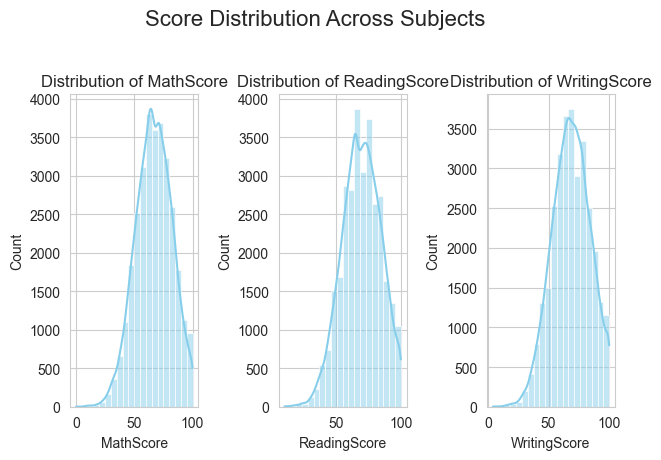

In [17]:
# Histograms
for i, col in enumerate(['MathScore', 'ReadingScore', 'WritingScore']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
plt.suptitle('Score Distribution Across Subjects', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**B. Impact of Test Preparation Course**

In [18]:
print("\n### B. Performance by Test Preparation Status ###")

prep_avg_score = df.groupby('TestPrep')[['AverageScore']].mean().sort_values(by='AverageScore', ascending=False).reset_index()
print(prep_avg_score)


### B. Performance by Test Preparation Status ###
    TestPrep  AverageScore
0  completed     72.660974
1       none     65.697532


C:\Users\DELL\AppData\Local\Temp\ipykernel_15056\3307994056.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TestPrep', y='AverageScore', data=prep_avg_score, palette='Set1')


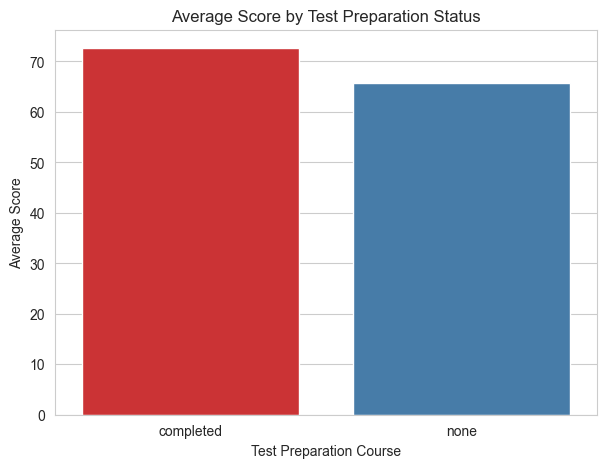

In [19]:
# Visualization
plt.figure(figsize=(7, 5))
sns.barplot(x='TestPrep', y='AverageScore', data=prep_avg_score, palette='Set1')
plt.title('Average Score by Test Preparation Status')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Score')
plt.show()

**C. Impact of Parental Education**

In [21]:
print("\n### C. Performance by Parental Education Level ###")

# Define the logical order for parental education levels
parent_education_order = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree",
    "Unknown"
]

educ_avg_score = df.groupby('ParentEduc')[['AverageScore']].mean().reindex(parent_education_order).reset_index().dropna(subset=['AverageScore'])
print(educ_avg_score)


### C. Performance by Parental Education Level ###
           ParentEduc  AverageScore
0    some high school     63.909069
1         high school     65.690288
2        some college     68.023871
3  associate's degree     69.929670
4   bachelor's degree     72.286572
5     master's degree     74.841984
6             Unknown     68.055646


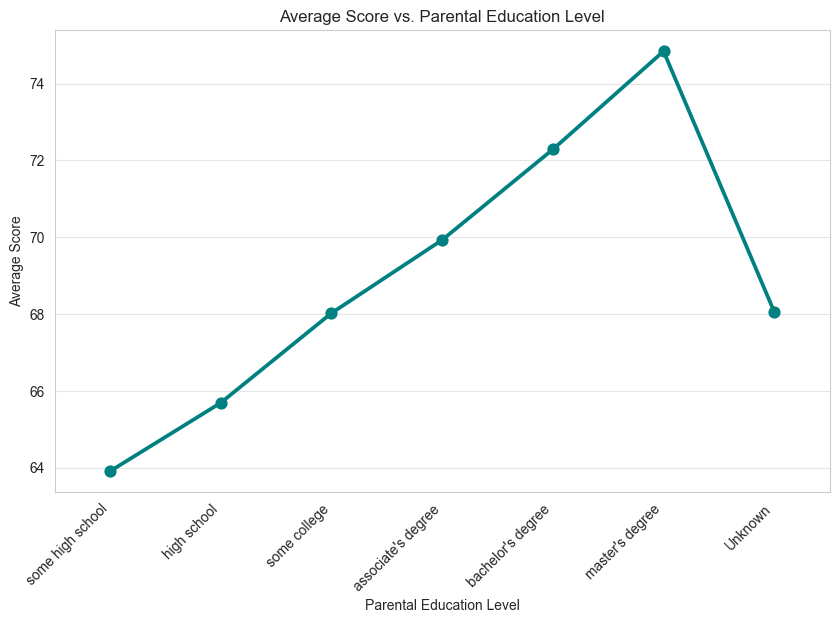

In [22]:
# Visualization
plt.figure(figsize=(10, 6))
sns.pointplot(x='ParentEduc', y='AverageScore', data=educ_avg_score, linestyles="-", color='teal', marker='o')
plt.title('Average Score vs. Parental Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', alpha=0.5)
plt.show()

**D. Impact of Weekly Study Hours**

In [23]:
print("\n### D. Performance by Weekly Study Hours ###")

# Define the logical order for study hours
study_hours_order = ['< 5', '5 - 10', '> 10', 'Unknown']

study_avg_score = df.groupby('WklyStudyHours')[['AverageScore']].mean().reindex(study_hours_order).reset_index()
print(study_avg_score)


### D. Performance by Weekly Study Hours ###
  WklyStudyHours  AverageScore
0            < 5     66.615562
1         5 - 10     68.389101
2           > 10     69.613290
3        Unknown     68.327400


C:\Users\DELL\AppData\Local\Temp\ipykernel_15056\3203692966.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WklyStudyHours', y='AverageScore', data=study_avg_score, palette='Purples')


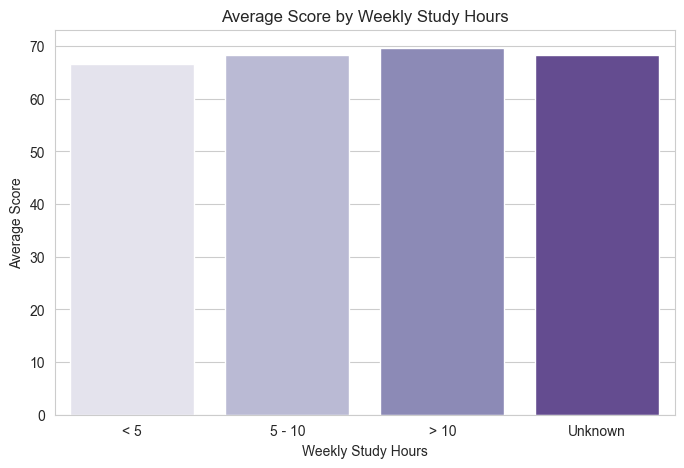

In [24]:
# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='WklyStudyHours', y='AverageScore', data=study_avg_score, palette='Purples')
plt.title('Average Score by Weekly Study Hours')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Average Score')
plt.show()

**E. Overall Pass/Fail Analysis**

In [25]:
print("\n### E. Overall Pass/Fail Analysis ###")

result_counts = df['Result'].value_counts()
print(result_counts)


### E. Overall Pass/Fail Analysis ###
Result
Pass    28808
Fail     1833
Name: count, dtype: int64


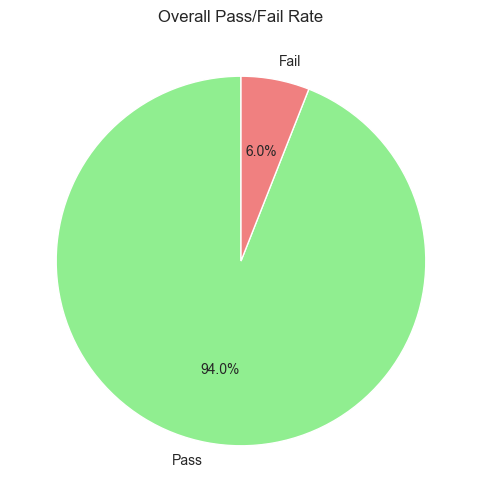

In [26]:
# Visualization: Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Overall Pass/Fail Rate')
plt.show()

**FINAL SUMMARY**

In [27]:
# Final Summary in Code: Aggregating Key Insights

# 1. Performance by Test Preparation Status
prep_avg_score = df.groupby('TestPrep')[['AverageScore']].mean().sort_values(by='AverageScore', ascending=False).reset_index()

print("### 1. Average Score by Test Preparation Status ###")
print(prep_avg_score)
print("-" * 50)

# 2. Performance by Parental Education Level (Ordered)
parent_education_order = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree",
    "Unknown"
]

educ_avg_score = df.groupby('ParentEduc')[['AverageScore']].mean().reindex(parent_education_order).reset_index().dropna(subset=['AverageScore'])

print("\n### 2. Average Score by Parental Education Level (Key Driver) ###")
print(educ_avg_score)
print("-" * 50)

# 3. Performance by Weekly Study Hours (Ordered)
study_hours_order = ['< 5', '5 - 10', '> 10', 'Unknown']

study_avg_score = df.groupby('WklyStudyHours')[['AverageScore']].mean().reindex(study_hours_order).reset_index()

print("\n### 3. Average Score by Weekly Study Hours ###")
print(study_avg_score)
print("-" * 50)

# 4. Overall Pass/Fail Count
result_counts = df['Result'].value_counts().reset_index()
result_counts.columns = ['Result', 'Count']

print("\n### 4. Overall Pass/Fail Counts ###")
print(result_counts)
print("-" * 50)

# 5. Exporting the consolidated summary data to CSV for easy review
# (This part creates a readable table summarizing the key data points for export)
final_summary = pd.DataFrame({
    'Metric': ['TestPrep: Completed', 'TestPrep: None',
               "ParentEduc: Master's Degree", "ParentEduc: Some High School",
               'StudyHours: > 10', 'StudyHours: < 5',
               'Overall Result: Pass', 'Overall Result: Fail'],
    'Value': [
        prep_avg_score[prep_avg_score['TestPrep'] == 'completed']['AverageScore'].values[0],
        prep_avg_score[prep_avg_score['TestPrep'] == 'none']['AverageScore'].values[0],
        educ_avg_score[educ_avg_score['ParentEduc'] == "master's degree"]['AverageScore'].values[0],
        educ_avg_score[educ_avg_score['ParentEduc'] == "some high school"]['AverageScore'].values[0],
        study_avg_score[study_avg_score['WklyStudyHours'] == '> 10']['AverageScore'].values[0],
        study_avg_score[study_avg_score['WklyStudyHours'] == '< 5']['AverageScore'].values[0],
        result_counts[result_counts['Result'] == 'Pass']['Count'].values[0],
        result_counts[result_counts['Result'] == 'Fail']['Count'].values[0]
    ]
})

final_summary.to_csv('analysis_summary.csv', index=False)
print("\nConsolidated summary data saved to analysis_summary.csv.")

### 1. Average Score by Test Preparation Status ###
    TestPrep  AverageScore
0  completed     72.660974
1       none     65.697532
--------------------------------------------------

### 2. Average Score by Parental Education Level (Key Driver) ###
           ParentEduc  AverageScore
0    some high school     63.909069
1         high school     65.690288
2        some college     68.023871
3  associate's degree     69.929670
4   bachelor's degree     72.286572
5     master's degree     74.841984
6             Unknown     68.055646
--------------------------------------------------

### 3. Average Score by Weekly Study Hours ###
  WklyStudyHours  AverageScore
0            < 5     66.615562
1         5 - 10     68.389101
2           > 10     69.613290
3        Unknown     68.327400
--------------------------------------------------

### 4. Overall Pass/Fail Counts ###
  Result  Count
0   Pass  28808
1   Fail   1833
--------------------------------------------------

Consolidated summar